These are the exercise problems from the book Python programming and Numerical methods book:

https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

# Chapter 14: LINEAR ALGEBRA AND SYSTEMS OF LINEAR EQUATIONS

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.07-Summary-and-Problems.html#problems

Only those problems that need to be solved in a notebook environment

In [1]:
import numpy as np

1. Show that matrix multiplication distributes over matrix addition: show 𝐴(𝐵+𝐶)=𝐴𝐵+𝐴𝐶
 assuming that 𝐴,𝐵
, and 𝐶
 are matrices of compatible size.

In [2]:
np.random.seed(123)
A = np.random.randint(10, size=(3, 3))
B = np.random.randint(10, size=(3, 4))
C = np.random.randint(10, size=(3, 4))

print(A.shape)
print(A)
print()
print(B.shape)
print(B)
print()
print(C.shape)
print(C)
print()

print('AB')
print(A@B)
print()

print('AC')
print(A@C)
print()

print('AB + AC')
print(A@B + A@C)
print()

print('A(B+C)')
print(A@(B+C))
print()

print(np.array_equal(A@B + A@C, A@(B+C)))

(3, 3)
[[2 2 6]
 [1 3 9]
 [6 1 0]]

(3, 4)
[[1 9 0 0]
 [9 3 4 0]
 [0 4 1 7]]

(3, 4)
[[3 2 4 7]
 [2 4 8 0]
 [7 9 3 4]]

AB
[[20 48 14 42]
 [28 54 21 63]
 [15 57  4  0]]

AC
[[52 66 42 38]
 [72 95 55 43]
 [20 16 32 42]]

AB + AC
[[ 72 114  56  80]
 [100 149  76 106]
 [ 35  73  36  42]]

A(B+C)
[[ 72 114  56  80]
 [100 149  76 106]
 [ 35  73  36  42]]

True


---

2. Write a function my_is_orthogonal(v1,v2, tol), where 𝑣1
 and 𝑣2
 are column vectors of the same size and 𝑡𝑜𝑙
 is a scalar value strictly larger than 0. The output should be 1 if the angle between 𝑣1
 and 𝑣2
 is within tol of 𝜋/2
; that is, |𝜋/2−𝜃|<tol
, and 0 otherwise. You may assume that 𝑣1
 and 𝑣2
 are column vectors of the same size, and that 𝑡𝑜𝑙
 is a positive scalar.

In [3]:
def my_is_orthogonal(v1, v2, tol):

  dot_prod = (v1.T@v2)[0,0]
  mag_v1 = np.linalg.norm(v1)
  mag_v2 = np.linalg.norm(v2)

  angle = np.arccos(dot_prod/(mag_v1*mag_v2))

  print(angle)
  if np.abs(np.pi/2 - angle) < tol:
    return 1
  else:
    return 0

In [4]:
# Test cases for problem 2
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

# output: 1
my_is_orthogonal(a,b, 0.01)

1.5687963274615628


1

In [5]:
# output: 0
my_is_orthogonal(a,b, 0.001)

1.5687963274615628


0

In [6]:
# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
my_is_orthogonal(a,b, 0.01)

0.7843981637307818


0

In [7]:
# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
my_is_orthogonal(a,b, 1e-10)

1.5707963267948966


1

In [8]:
# additional example
# expected answer: angle: 0.97992471, output: 0
v1 = np.array([[10],[9],[3]])
v2 = np.array([[2],[5],[12]])

print(v1.shape)
print(v2.shape)

print(my_is_orthogonal(v1,v2, 1e-10))

(3, 1)
(3, 1)
0.979924710443726
0


---

3. Write a function my_is_similar(s1,s2,tol) where 𝑠1
 and 𝑠2
 are strings, not necessarily the same size, and 𝑡𝑜𝑙
 is a scalar value strictly larger than 0. From 𝑠1
 and 𝑠2
, the function should construct two vectors, 𝑣1
 and 𝑣2
, where 𝑣1[0]
 is the number of ‘a’s in 𝑠1
, 𝑣1[1]
 is the number ‘b’s in 𝑠1
, and so on until 𝑣1[25]
, which is the number of ‘z’s in 𝑣1
. The vector 𝑣2
 should be similarly constructed from 𝑠2
. The output should be 1 if the absolute value of the angle between 𝑣1
 and 𝑣2
 is less than tol; that is, |𝜃|<tol
.



In [9]:
def my_is_similar(s1,s2,tol):

    s1_count = []
    s2_count = []

    alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

    for alpha in alphabets:
      s1_count.append(s1.count(alpha))
      s2_count.append(s2.count(alpha))

    s1_count = np.expand_dims(np.array(s1_count), axis = 1)
    s2_count = np.expand_dims(np.array(s2_count), axis = 1)

    dot_prod = s1_count.T @ s2_count
    mag_s1 = np.linalg.norm(s1_count)
    mag_s2 = np.linalg.norm(s2_count)

    angle = np.arccos(dot_prod/(mag_s1*mag_s2))

    if np.abs(angle) < tol:
      return 1
    else:
      return 0


In [10]:
s1 = 'strictly'
s2 = 'onomatopoeia'
tol = 1.5

# expected answer: 1
my_is_similar(s1, s2, tol)

1

---

4. Write a function my_make_lin_ind(A), where 𝐴
 and 𝐵
 are matrices. Let the 𝑟𝑎𝑛𝑘(𝐴)=𝑛
. Then 𝐵
 should be a matrix containing the first 𝑛
 columns of 𝐴
 that are all linearly independent. Note that this implies that 𝐵
 is full rank.

The simple way to find all linearly independent columns is performing a reduced row echolon form. All of the pivot columns are linearly independent.

Breaking down the steps using sympy.

https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html

Matrix function from sympy converts a numpy matrix to a sympy object and then the rref method returns to elements, first the matrix in reduced row echolon form and second the pivot column indices.

In [11]:
from sympy import *

In [12]:
A = np.array([[12,24,0,11,-24,18,15],
              [19,38,0,10,-31,25,9],
              [1,2,0,21,-5,3,20],
              [6,12,0,13,-10,8,5],
              [22,44,0,2,-12,17,23]])

Matrix(A).rref()

(Matrix([
 [1, 2, 0, 0, 0,  1/2, 0],
 [0, 0, 0, 1, 0,    0, 0],
 [0, 0, 0, 0, 1, -1/2, 0],
 [0, 0, 0, 0, 0,    0, 1],
 [0, 0, 0, 0, 0,    0, 0]]),
 (0, 3, 4, 6))

In [13]:
Matrix(A).rref()[0]

Matrix([
[1, 2, 0, 0, 0,  1/2, 0],
[0, 0, 0, 1, 0,    0, 0],
[0, 0, 0, 0, 1, -1/2, 0],
[0, 0, 0, 0, 0,    0, 1],
[0, 0, 0, 0, 0,    0, 0]])

In [14]:
Matrix(A).rref()[1]

(0, 3, 4, 6)

In [15]:
A[:,Matrix(A).rref()[1]]

array([[ 12,  11, -24,  15],
       [ 19,  10, -31,   9],
       [  1,  21,  -5,  20],
       [  6,  13, -10,   5],
       [ 22,   2, -12,  23]])

converting to a function

In [16]:
def my_make_lin_ind(A):

  B = A[:, Matrix(A).rref()[1]]
  return B

In [17]:
## Test cases for problem 4

A = np.array([[12,24,0,11,-24,18,15],
              [19,38,0,10,-31,25,9],
              [1,2,0,21,-5,3,20],
              [6,12,0,13,-10,8,5],
              [22,44,0,2,-12,17,23]])

B = my_make_lin_ind(A)
B
# B = [[12,11,-24,15],
#      [19,10,-31,9],
#      [1,21,-5,20],
#      [6,13,-10,5],
#      [22,2,-12,23]]

array([[ 12,  11, -24,  15],
       [ 19,  10, -31,   9],
       [  1,  21,  -5,  20],
       [  6,  13, -10,   5],
       [ 22,   2, -12,  23]])

---

5. Cramer’s rule is a method of computing the determinant of a matrix. Consider an 𝑛×𝑛
 square matrix 𝑀
. Let 𝑀(𝑖,𝑗)
 be the element of 𝑀
 in the 𝑖-th row and 𝑗-th column of 𝑀
, and let 𝑚𝑖,𝑗
 be the minor of 𝑀
 created by removing the 𝑖-th row and 𝑗-th column from 𝑀
. Cramer’s rule says that $det(M)=∑_{i=1}^{n}(−1)^{𝑖−1}𝑀(1,𝑖)det(𝑚_{𝑖,𝑗}).$

Write a function my_rec_det(M), where the output is 𝑑𝑒𝑡(𝑀)
. The function should use Cramer’s rule to compute the determinant, not Numpy’s function.

In [18]:
A = np.array([[1, 1, 2],
              [4, 3, 0],
              [2, 2, 1]])

A

array([[1, 1, 2],
       [4, 3, 0],
       [2, 2, 1]])

In [19]:
np.linalg.det(A)

2.9999999999999996

In [20]:
# helper function to eliminate rows and columns. We implemented this exercise_6.

def smaller_matrix(X, idx):
  # all values are True initially
  bool_matrix = np.ones(X.shape, dtype = bool)

  # first row will be false as we will be extracting matrices from row 2 onwards
  bool_matrix[0,:] = False

  # idx here means the column that will be set to false. So, for example we have a 3 by 3 matrix and we wish to extract
  # a 2 by 2 matrix by extracting two rows from column 1 and two rows from column 3, then idx will be 2 to set column 2
  # as False
  bool_matrix[:,idx] = False

  # once extracted. Reshape them to len(X) - 1, len(X) - 1 so that the output is a matrix
  return X[bool_matrix].reshape(len(X)-1,len(X)-1)

In [21]:
smaller_matrix(A, 0)

array([[3, 0],
       [2, 1]])

In [22]:
def determinant(A):

  if len(A) == 2:
    return A[0,0]*A[1,1] - A[0,1]*A[1,0]

  else:
    det = 0

    for idx in range(len(A)):
      det += ((-1)**((idx+1) - 1)) * A[0,idx] * determinant(smaller_matrix(A, idx))

    return det

In [23]:
determinant(A)

3

In [24]:
A = np.array([[1, 2, 4],
              [1, 2, 3],
              [2, 1, 0]])

A

array([[1, 2, 4],
       [1, 2, 3],
       [2, 1, 0]])

In [25]:
np.linalg.det(A)

-2.9999999999999996

In [26]:
determinant(A)

-3

---

6. What is the complexity of my_rec_det in the previous problem? Do you think this is an effective way of determining if a matrix is singular or not?

For a matrix of size n we have to compute determinants of n-1 matrix for each of the n values in row 1 and then for each n-1 matrix we do the same with n-2 matrices till we get to 2 where we compute the determinant. This is clearly O(n!) time complexity.

Even though getting the determinant helps estimate whether a matrix is singular, given it's time complexity it is not the most effective way to determine if a matrix is singular as for larger matrices, it is computationally expensive.

---

7. Let 𝑝
 be a vector with length 𝐿
 containing the coefficients of a polynomial of order 𝐿−1
. For example, the vector 𝑝=[1,0,2]
 is a representation of the polynomial $𝑓(𝑥)=1𝑥^2+0𝑥+2$
. Write a function my_poly_der_mat(p), where 𝑝
 is the aforementioned vector, and the output 𝐷
 is the matrix that will return the coefficients of the derivative of 𝑝
 when 𝑝
 is left multiplied by 𝐷
. For example, the derivative of 𝑓(𝑥)
 is 𝑓′(𝑥)=2𝑥
, and therefore, 𝑑=𝐷𝑝
 should yield 𝑑=[2,0]
. Note this implies that the dimension of 𝐷
 is 𝐿−1×𝐿
. The point of this problem is to show that integrating polynomials is actually a linear transformation.

Lets think through the solutions to some of the problems by hand.

f(x) = $x^2 + 2$

e.g. 1: we can put this as: $x^2 + 0x + 2$

coeffs are: [1, 0, 2]

derivative is: 2x + 0 (technically derivative of 0x is 0)

coeffs are: [2, 0]


e.g. 2: $x^3 + 2x + 2$

coeffs are: [1, 0, 2, 2]

derivative: $3x^2 + 0x + 2$

coeffs are: [3, 0, 2]

input is size L and output is size L - 1.

if the highest power is 2 then there are 3 elements in the input list and if the highest power is 3 then there are elements in the input list.

one possible solution is:

we can creat a matrix of 0's of size (L-1, L) and fill the diagonal elements with the inputs till we reach L - 1.

e.g. 1 p = [1,0,2]

L = 3, L - 1 = 2

D = $\begin{bmatrix}0 & 0 & 0\\0 & 0 & 0\end{bmatrix}$

power = L - 1 = 2

i in range(2):

i = 0

D[0,0] = 2

D = $\begin{bmatrix}2 & 0 & 0\\0 & 0 & 0\end{bmatrix}$

power - 1 = 1

i = 1

D[1,1] = 1

D = $\begin{bmatrix}2 & 0 & 0\\0 & 1 & 0\end{bmatrix}$

for e.g. 2:

p = [1,0,2,2]

L = 4, L - 1 = 3

D = $\begin{bmatrix}0 & 0 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 & 0 & 0\end{bmatrix}$

power = L - 1 = 3

i in range(3):

i = 0

D[0,0] = 3

D = $\begin{bmatrix}3 & 0 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 & 0 & 0\end{bmatrix}$


power - 1 = 2


i = 1

D[1,1] = 2

D = $\begin{bmatrix}3 & 0 & 0 & 0\\0 & 2 & 0 & 0\\0 & 0 & 0 & 0\end{bmatrix}$

power - 1 = 1

i = 2

D[2,2] = 1

D = $\begin{bmatrix}3 & 0 & 0 & 0\\0 & 2 & 0 & 0\\0 & 0 & 1 & 0\end{bmatrix}$







In [27]:
import numpy as np

def my_poly_der_mat(p):
    L = len(p)  # Length of the polynomial vector p
    D = np.zeros((L - 1, L))
    highest_power = L - 1

    for i in range(L - 1):
        D[i, i] = highest_power
        highest_power -= 1

    return D

In [28]:
p = [1,0,2]
my_poly_der_mat(p)

array([[2., 0., 0.],
       [0., 1., 0.]])

In [29]:
my_poly_der_mat(p) @ np.array(p)

array([2., 0.])

In [30]:
p = [1,0,2,2]
my_poly_der_mat(p)

array([[3., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 0.]])

In [31]:
my_poly_der_mat(p) @ np.array(p)

array([3., 0., 2.])

example with more polynomials

f(x) = $6x^5 + 7x^3 + 3x^2 + 5$

f'(x) = $30x^4 + 21x^2 + 6x$

p: [6, 0, 7, 3, 0, 5]

d: [30, 0, 21, 6, 0]  (even though there is no $x^4$ and x we have 0's for them)



In [32]:
p = [6,0,7,3,0,5] #p vector
my_poly_der_mat(p)

array([[5., 0., 0., 0., 0., 0.],
       [0., 4., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [33]:
my_poly_der_mat(p) @ np.array(p)

array([30.,  0., 21.,  6.,  0.])

So, a vector representing the coefficients of a function's polynomials times diagnolaized matrix of the highest power - 1 till 1 results in a vector of coefficients of the derivative's polynomial.

---

8. Use Gauss Elimination to solve the following equations.

$3x_1 - x_2 + 4x_3 = 2$

$17x_1 + 2x_2 + x_3 = 14$

$x_1 + 12x_2 - 7x_3 = 54$

Gauss Elimination:

Getting in augmented matrix form:

$\begin{bmatrix}3 & -1 & 4\\17 & 2 & 1\\1 & 12 & -7\end{bmatrix}$$\begin{bmatrix}2\\14\\54\end{bmatrix}$

R2 - (17/3)R1 <br>
R3 - (1/3)R1

$\begin{bmatrix}3 & -1 & 4\\0 & 23/3 & -65/3\\0 & 37/3 & -25/3\end{bmatrix}$$\begin{bmatrix}2\\8/3\\160/3\end{bmatrix}$

R2*3 <br>
R3 + (-37/69)R2

$\begin{bmatrix}3 & -1 & 4\\0 & 23 & -65\\0 & 0 & 1830/69\end{bmatrix}$$\begin{bmatrix}2\\8\\3384/69\end{bmatrix}$

R3 * 69

$\begin{bmatrix}3 & -1 & 4\\0 & 23 & -65\\0 & 0 & 1830\end{bmatrix}$$\begin{bmatrix}2\\8\\3384\end{bmatrix}$

1830x3 = 3384

__x3 = 1.849__ (rounded)

23x2 - 65x3 = 8

23x2 - 65(1.849) = 8

23x2 = 128.1967

__x2 = 5.574__ (rounded)

3x1 - x2 + 4x3 = 2

3x1 - 5.574 + 4(1.849) = 2

3x1 = 0.178

__x1 = 0.0593__ (rounded)



In [34]:
65*37

2405

In [35]:
23*25

575

In [36]:
-575+2405

1830

In [37]:
A = np.array([[3,-1,4,2],[17,2,1,14],[1,12,-7,54]])
A

array([[ 3, -1,  4,  2],
       [17,  2,  1, 14],
       [ 1, 12, -7, 54]])

In [38]:
Matrix(A).echelon_form()

Matrix([
[3, -1,    4,    2],
[0, 23,  -65,    8],
[0,  0, 1830, 3384]])

In [39]:
A = np.array([[3,-1,4],[17,2,1],[1,12,-7]])
y = np.array([2,14,54])

np.linalg.solve(A,y)

array([0.05901639, 5.57377049, 1.84918033])

we see some difference in our solution due to rounding errors

---

9. Use Gauss-Jordan Elimination to solve the above equations in problem 8.

Gauss Jordan Elimination (reduced row echolon form):

Getting in augmented matrix form:

$\begin{bmatrix}3 & -1 & 4\\17 & 2 & 1\\1 & 12 & -7\end{bmatrix}$$\begin{bmatrix}2\\14\\54\end{bmatrix}$

swapping R1 and R3

$\begin{bmatrix}1 & 12 & -7\\17 & 2 & 1\\3 & -1 & 4\end{bmatrix}$$\begin{bmatrix}54\\14\\2\end{bmatrix}$

R2 - 17R1 <br>
R3 - 3R1

$\begin{bmatrix}1 & 12 & -7\\0 & -202 & 120\\0 & -37 & 25\end{bmatrix}$$\begin{bmatrix}54\\-904\\-160\end{bmatrix}$

R2 * -1/202 <br>
R3 + 37R2 <br>
R1 - 12R2

$\begin{bmatrix}1 & 0 & 26/202\\0 & 1 & -120/202\\0 & 0 & 610/202\end{bmatrix}$$\begin{bmatrix}60/202\\904/202\\1128/202\end{bmatrix}$

R3 * 202/610 <br>
R1 - (26/202)R3 <br>
R2 + (120/202)R3

$\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix}$$\begin{bmatrix}7272/123220\\686800/123220\\1128/610\end{bmatrix}$



In [40]:
7272/123220

0.05901639344262295

In [41]:
686800/123220

5.573770491803279

In [42]:
1128/610

1.8491803278688526

---

10. Get the lower triangular matrix 𝐿
 and upper triangular matrix 𝑈
 from the equations in problem 8.

In [43]:
# matrix from problem 8
A = np.array([[3,-1,4],[17,2,1],[1,12,-7]])
A

array([[ 3, -1,  4],
       [17,  2,  1],
       [ 1, 12, -7]])

In [44]:
from scipy.linalg import lu

In [45]:
P, L, U = lu(A)

print('Permutation Matrix:')
print(P)
print()

print('L:')
print(L)
print()

print('U:')
print(U)
print()

Permutation Matrix:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

L:
[[ 1.          0.          0.        ]
 [ 0.05882353  1.          0.        ]
 [ 0.17647059 -0.11386139  1.        ]]

U:
[[17.          2.          1.        ]
 [ 0.         11.88235294 -7.05882353]
 [ 0.          0.          3.01980198]]



In [46]:
L @ U

array([[17.,  2.,  1.],
       [ 1., 12., -7.],
       [ 3., -1.,  4.]])

In [47]:
P @ L @ U

array([[ 3., -1.,  4.],
       [17.,  2.,  1.],
       [ 1., 12., -7.]])

---

11. Show that the dot product distributes across vector addition, that is, show that 𝑢⋅(𝑣+𝑤)=𝑢⋅𝑣+𝑢⋅𝑤.

In [48]:
np.random.seed(1)
u = np.random.randint(10, size = (10,))
v = np.random.randint(10, size = (10,))
w = np.random.randint(10, size = (10,))

print('u.(v+w)')
print(u @ (v + w))
print()

print('u.v + u.w)')
print(u @ v + u @ w)

u.(v+w)
476

u.v + u.w)
476


---

12. Consider the following network consisting of two power supply stations denoted by 𝑆1
 and 𝑆2
 and five power recipient nodes denoted by 𝑁1
 to 𝑁5
. The nodes are connected by power lines, which are denoted by arrows, and power can flow between nodes along these lines in both directions.

Let 𝑑𝑖
 be a positive scalar denoting the power demands for node 𝑖
, and assume that this demand must be met exactly. The capacity of the power supply stations is denoted by 𝑆
. Power supply stations must run at their capacity. For each arrow, let 𝑓𝑗
 be the power flow along that arrow. Negative flow implies that power is running in the opposite direction of the arrow.

 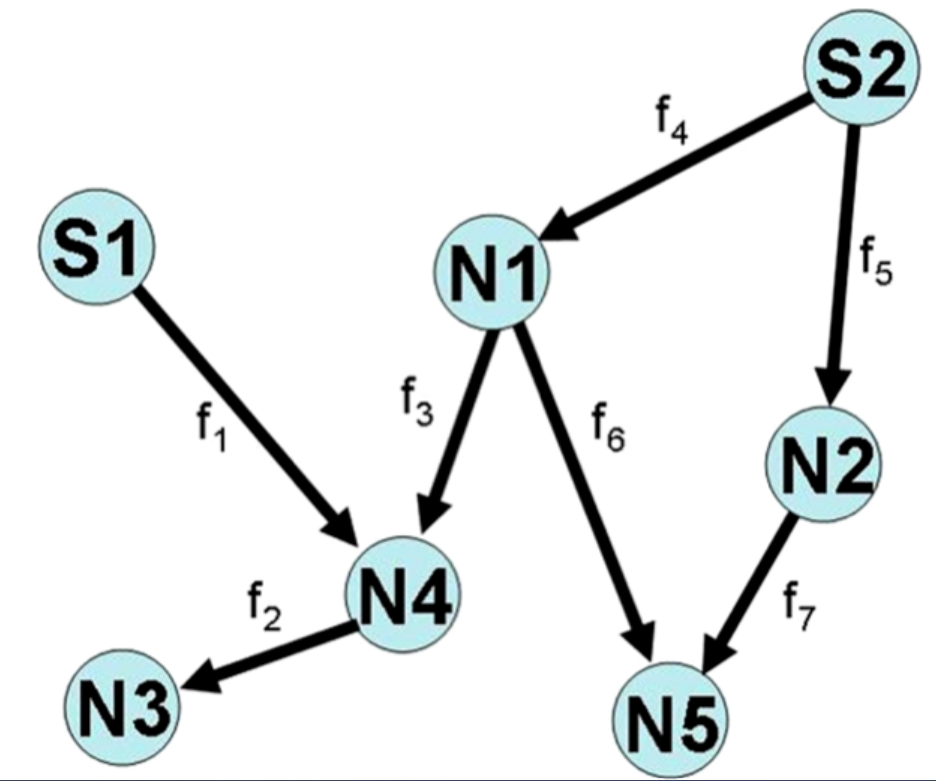

 Write a function my_flow_calculator(S, d), where 𝑆
 is a 1×2
 vector representing the capacity of each power supply station, and 𝑑
 is a 1×5
 row vector representing the demands at each node (i.e., 𝑑[0]
 is the demand at node 1). The output argument, 𝑓
, should be a 1×7
 row vector denoting the flows in the network (i.e., 𝑓[0]=𝑓1
 in the diagram). The flows contained in 𝑓
 should satisfy all constraints of the system, like power generation and demands. Note that there may be more than one solution to the system of equations.

The total flow into a node must equal the total flow out of the node plus the demand; that is, for each node $𝑖,𝑓_{inflow}=𝑓_{outflow}+𝑑_𝑖$. You may assume that $Σ𝑆_𝑗=Σ𝑑_𝑖$
.

__Solution approach:__

There are 7 edges in total between each of the 7 nodes (stations or recipents)

When it comes to flow between nodes, a flow could either be an inflow, outflow, or no connection.

We can construct a matrix 7 by 7 denoting an adjacency matrix created for graphs where the entries can be the following:

__0:__ no connection between the nodes

__1:__ flow in to node i

__-1:__ flow out of node i

<pre>
     f1    f2    f3    f4    f5    f6    f7  
N1    0     0    -1     1     0    -1     0  

N2    0     0     0     0     1     0    -1

N3    0     1     0     0     0     0     0

N4    1    -1     1     0     0     0     0

N5    0     0     0     0     0     1     1

S1    1     0     0     0     0     0     0

S2    0     0     0     1     1     0     0
</pre>

__What each row represents:__

rows represent the 5 nodes and 2 stations and columns are the flows. N1 has no connection to f1 and f2 in the question graph so we have 0's for those two columns. The only arrows connected to N1 are f3, f4, f6. So, all other columns are 0's. f3, f6 represent an outflow from N1 whereas f4 represents an inflow into N1 and thus columns for f3 and f6 have -1 and column for f4 has 1. Similarly we fill all rows till N5

__note:__  for S1 and S2 the only question is whether there is a connection or not with a particular flow, which is a binary outcome. So, we only need to fill in 0 or 1. S1 is connected to f1 only and hence column f1 is a 1 and rest all 0's. Similarly, S2 is commected to f4 and f5 and hence those columns are 1 with rest all 0's.

For the nodes, there were two questions, first whether there is a connection and if so which way (inflow or outflow) and hence we needed 0, 1, -1.

<br><br>

__Constrainsts:__ <br>
we need to satisfy the constaraint where $f_{in} = f_{out} + d_i$

This means that an inflow into a node must equal the outflow from the node plus the demand at the node.

we have a matrix that records an inflow or outflow.

So, the matrix of inflows and outflows times the value in the output must result in the demand or the capacity.

Since, we have the flows for all the nodes in a matrix, we can also organize the demand (d) and capacity (s) from the stations in a single 7 dimensional vector and call it b.

Now, the output of the function f multiplied by A should result in b.

Thus, we solve for Af = b.

f would contain the flows in such a way where the result is the total demand per node and the total capacity in each station. In other words, this will ensure we use up all of the available capacity from both the stations and meet the demands in each node by satisfying the inflow = outflow + demand criteria.

------------------------------------------------------------------------

However, if A is a singular matrix then we cannot solve this directly using system of equations as there can be infinitely many solutions.

Per the textbook pg.247

In Ax = b system of equations:

if rank([A,b]) = rank(A) then b is linearly dependent on A and there is atleast one unique solution.

However, if rank([A,b]) = rank(A) and rank(A) is < n, where n are the number of columns in A (singular matrix) then there are inifinitely many solutions to the problem (below is an example).

if rank([A,b]) = rank(A) and rank(A) = n (full rank matrix) then there is one unique solution for x to the system of equations.

However, if rank([A, b]) = rank(A) + 1 then b is linearly independent of A and there is no solution for x.


Why singular matrices can have inifinitely many solutions.

<pre>

 a + 2b +   3c =  8
3a + 3b + 4.5c = 15

3R1 - 2R2

3a + 6b +  9c = 24
6a + 6b +  9c = 30
-  -    -       -

-3a = -6

a = 2

any b and c that satisfy this equation can be true. Thus there are infinitely many solutions.


</pre>

In [49]:
# here is a matrix 3 by 3 that had unique solutions in an above problem. its rank is 3 (full rank)
A = np.array([[3,-1,4],[17,2,1],[1,12,-7]])
np.linalg.matrix_rank(A)

3

Step by step solution:

In [50]:
# position vector
A = [0, 0,-1, 1, 0,-1, 0,
     0, 0, 0, 0, 1, 0, -1,
     0, 1, 0, 0, 0, 0, 0,
     1,-1, 1, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 1, 1,
     1, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 1, 1, 0, 0]

# Converting A into 7x7 numpy matrix
A = np.array(A).reshape((7,7))
A

array([[ 0,  0, -1,  1,  0, -1,  0],
       [ 0,  0,  0,  0,  1,  0, -1],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 1, -1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0]])

In [51]:
s = np.array([[10, 10]])
d = np.array([[3, 4, 5, 4, 4]])

b = np.append(d, s)
b

array([ 3,  4,  5,  4,  4, 10, 10])

In [52]:
b = b.reshape((len(b),1))
print(b.shape)
b

(7, 1)


array([[ 3],
       [ 4],
       [ 5],
       [ 4],
       [ 4],
       [10],
       [10]])

can we solve for this?

In [53]:
np.linalg.matrix_rank(A)

6

size of A is 7 by 7 and rank is 6. This indicates its a singular matrix.

In [54]:
# will thrown an error as A is a singular matrix
# np.linalg.solve(A, b)

Is b linearly dependent on A?

In [55]:
np.linalg.matrix_rank(np.append(A, b, axis = 1))

6

rank([A,b]) = rank(A) and thus b is linearly dependent on columns of A and thus there is atleast one solution to the problem. However, since rank(A) < n (A is singular) there are infinitely many solutions to the problem.

One way to solve it is to isolate the x on one side of the equation.

In simple algebra,

ax = b  -->   x = a/b

we can't divide matrices and so we can take a pseudoinverse (used for singular matrix.

For Ax = b

Left multiplying both sides by $A^{-1}$ we get:

$A^{-1}Ax = A^{-1}b$ --> $x = A^{-1}b$



In [56]:
x = np.linalg.pinv(A) @ b
x

array([[10. ],
       [ 5. ],
       [-1. ],
       [ 4.5],
       [ 5.5],
       [ 2.5],
       [ 1.5]])

Converting to a function

In [57]:
def my_flow_calculator(s, d):

  # matrix containing relationship of flows with the nodes
  A = [0, 0,-1, 1, 0,-1, 0,
       0, 0, 0, 0, 1, 0, -1,
       0, 1, 0, 0, 0, 0, 0,
       1,-1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0]

  # Converting A into 7x7 numpy matrix
  A = np.array(A).reshape((7,7))

  # solution vector: concatenate d and s
  b = np.append(d, s)
  b = b.reshape((len(b),1))

  # solving for x

  # checking if rank([A,b]) = rank(A): i.e. b is linearly dependent on columns of A
  if np.linalg.matrix_rank(np.append(A, b, axis = 1)) == np.linalg.matrix_rank(A):

    # check if A is singular
    if np.linalg.matrix_rank(A) < A.shape[1]:
        x = np.linalg.pinv(A) @ b

    # if A is full rank then we can use solve to get x
    elif np.linalg.matrix_rank(A) == A.shape[1]:
        x = np.linalg.solve(A, b)

  # checking if rank([A,b]) = rank(A) + 1. If so then b is independent of the columns of A and thus there is no soln.
  elif np.linalg.matrix_rank(np.append(A, b, axis = 1)) == np.linalg.matrix_rank(A) + 1:
     print('b is independent of the columns of A and thus there is no solution.')
     x = []

  return x

In [58]:
## test cases

s = np.array([[10, 10]])
d = np.array([[4, 4, 4, 4, 4]])

# f = [[10.0, 4.0, -2.0, 4.5, 5.5, 2.5, 1.5]]
f = my_flow_calculator(s, d)
f

array([[10. ],
       [ 4. ],
       [-2. ],
       [ 4.5],
       [ 5.5],
       [ 2.5],
       [ 1.5]])

In [59]:
s = np.array([[10, 10]])
d = np.array([[3, 4, 5, 4, 4]])

# f = [[10.0, 5.0, -1.0, 4.5, 5.5, 2.5, 1.5]]
f = my_flow_calculator(s, d)
f

array([[10. ],
       [ 5. ],
       [-1. ],
       [ 4.5],
       [ 5.5],
       [ 2.5],
       [ 1.5]])